# Using plot_date and label rotation

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, timedelta
import random
import numpy as np

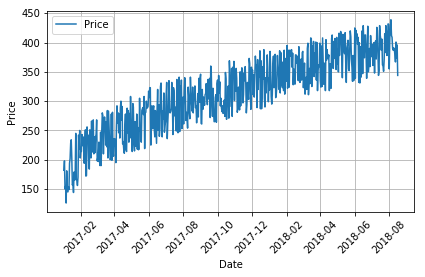

In [2]:
data_date = start_date = date(2017,1,1)
end_date = date.today()
dates = []
price = []

for i in range((end_date - start_date).days):
    data_date = data_date + timedelta(days=1)
    dates.append(mdates.date2num(data_date))
    price.append(random.randint(100 + int(10*i**(1/2)),200 + int(10*i**(1/2))))

price= np.array(price)
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

ax1.plot_date(dates, price,'-', label='Price')

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax1.grid(True)#, color='g', linestyle='-', linewidth=5)

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()


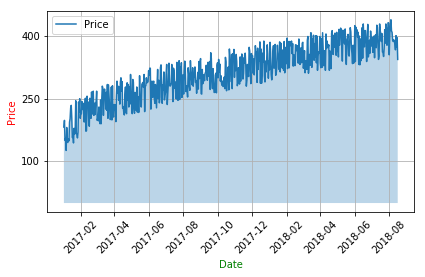

In [3]:

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

ax1.plot_date(dates, price,'-', label='Price')

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax1.grid(True)#, color='g', linestyle='-', linewidth=5)

ax1.xaxis.label.set_color('g')
ax1.yaxis.label.set_color('r')

ax1.set_yticks([100,250,400,550]) # Y-axis will show value only 100,250,400,550

ax1.fill_between(dates, 0, price, alpha=0.3) # fill graph with color

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()

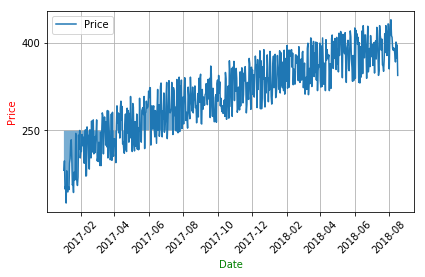

In [4]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

ax1.plot_date(dates, price,'-', label='Price')

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax1.grid(True)#, color='g', linestyle='-', linewidth=5)

ax1.xaxis.label.set_color('g')
ax1.yaxis.label.set_color('r')

ax1.set_yticks([100,250,400,550]) # Y-axis will show value only 100,250,400,550

ax1.fill_between(dates[:200], 250, price[:200], alpha=0.6) # fill graph with color

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()

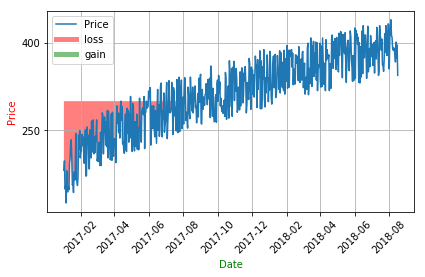

In [13]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

ax1.plot_date(dates, price,'-', label='Price')

ax1.plot([],[],linewidth=5, label='loss', color='r',alpha=0.5)
ax1.plot([],[],linewidth=5, label='gain', color='g',alpha=0.5)


for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax1.grid(True)#, color='g', linestyle='-', linewidth=5)

ax1.xaxis.label.set_color('g')
ax1.yaxis.label.set_color('r')

ax1.set_yticks([100,250,400,550]) # Y-axis will show value only 100,250,400,550

ax1.fill_between(dates[:200], price[:200], 300, where=(price[:200] > 300), facecolor='g', alpha=0.5)
ax1.fill_between(dates[:200], price[:200], 300, where=(price[:200] < 300), facecolor='r', alpha=0.5)


plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()


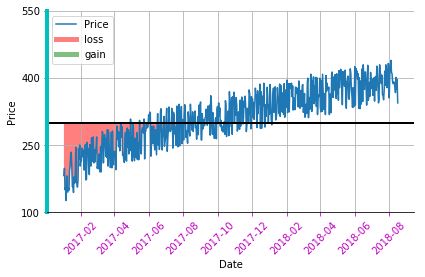

In [35]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

ax1.plot_date(dates, price,'-', label='Price')
ax1.plot([],[],linewidth=5, label='loss', color='r',alpha=0.5)
ax1.plot([],[],linewidth=5, label='gain', color='g',alpha=0.5)
ax1.fill_between(dates[:200], price[:200], 300, where=(price[:200] > 300), facecolor='g', alpha=0.5)
ax1.fill_between(dates[:200], price[:200], 300, where=(price[:200] < 300), facecolor='r', alpha=0.5)
ax1.axhline(300, color='k', linewidth=2)

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax1.grid(True)#, color='g', linestyle='-', linewidth=5)
ax1.set_yticks([100,250,400,550]) # Y-axis will show value only 100,250,400,550

ax1.spines['left'].set_color('c')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_linewidth(4)

ax1.tick_params(axis='x', colors='m')

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()

 # Candlestick OHLC graphs

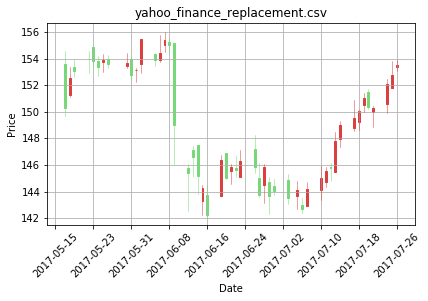

In [44]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc

import numpy as np
import urllib
import datetime as dt


def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))

    source_code = open(stock,'r').read()
    stock_data = []
    split_source = source_code.split('\n')[:50]
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('yahoo_finance_replacement.csv')

# Styles and animation

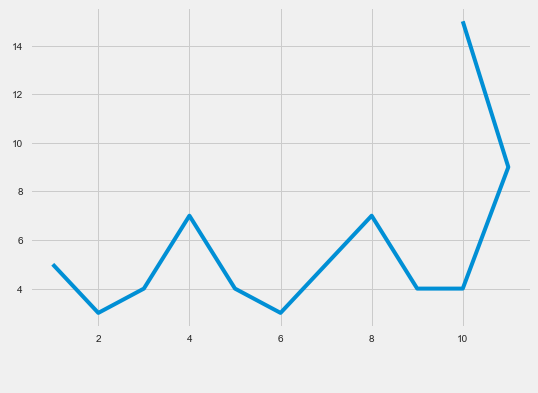

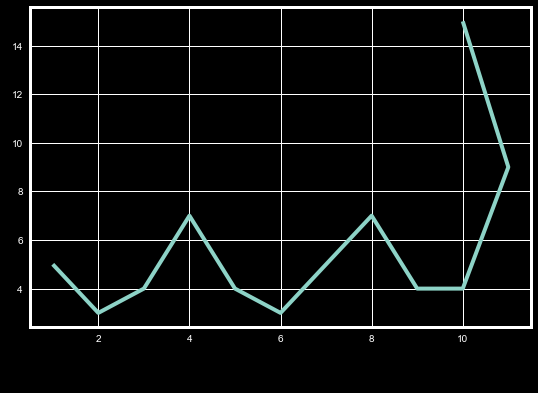

In [57]:
import matplotlib.animation as animation
from matplotlib import style
style.use('fivethirtyeight')

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    graph_data = open('example.txt','r').read()
    lines = graph_data.split('\n')
    xs = []
    ys = []
    for line in lines:
        if len(line) > 1:
            x, y = map(float, line.split(','))
            xs.append(x)
            ys.append(y)
    ax1.clear()
    ax1.plot(xs, ys)
    

ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show() 


# all styles are available here print(style.available)
###########################
style.use('dark_background')
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    graph_data = open('example.txt','r').read() # add lines in file to see changes in graph
    lines = graph_data.split('\n')
    xs = []
    ys = []
    for line in lines:
        if len(line) > 1:
            x, y = map(float, line.split(','))
            xs.append(x)
            ys.append(y)
    ax1.clear()
    ax1.plot(xs, ys)
    

ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()

In [47]:
dir(style)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'absolute_import',
 'available',
 'context',
 'core',
 'library',
 'reload_library',
 'use']

In [48]:
style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']